## VISHAL PANUGANTI
### DATA606

## Data Preperation

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import glob
import matplotlib
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from matplotlib.dates import YearLocator
from datetime import datetime

In [2]:
#dftest = pd.read_csv(r'C:\DataScience\606\Data\2010.csv')
#for col in dftest.columns:
#    print(col)

In [3]:
#Reading data in multiple csv files

path = r'C:\DataScience\606\Data'

all_files = glob.glob(path + "/*.csv")

li = []
cols = ["LATITUDE","LONGITUDE","ELEVATION","DATE","PRCP","SNOW","SNWD","TMAX","TMIN"]

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, usecols = lambda c: c in set(cols) ,sep = ',')
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [4]:
#converting DATE datatype to datetime
frame['DATE'] = pd.to_datetime(frame['DATE'], format = '%Y-%m-%d')

In [5]:
#for col in frame.columns:
#    print(col)

In [58]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636803 entries, 0 to 636802
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   LATITUDE   636803 non-null  float64       
 1   LONGITUDE  636803 non-null  float64       
 2   ELEVATION  626912 non-null  float64       
 3   DATE       636803 non-null  datetime64[ns]
 4   PRCP       621232 non-null  float64       
 5   SNOW       357849 non-null  float64       
 6   SNWD       126111 non-null  float64       
 7   TMAX       126390 non-null  float64       
 8   TMIN       126379 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 43.7 MB


In [6]:
frame.head()

,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SNOW,SNWD,TMAX,TMIN
0,39.0847,-76.9002,121.9,2010-01-01,0.04,0.0,NaN,41.0,28.0
1,39.0847,-76.9002,121.9,2010-01-02,0.00,0.0,NaN,28.0,18.0
2,39.0847,-76.9002,121.9,2010-01-03,0.00,0.0,NaN,25.0,20.0
3,39.0847,-76.9002,121.9,2010-01-04,0.00,0.0,NaN,32.0,14.0
4,39.0847,-76.9002,121.9,2010-01-05,0.00,0.0,NaN,33.0,22.0


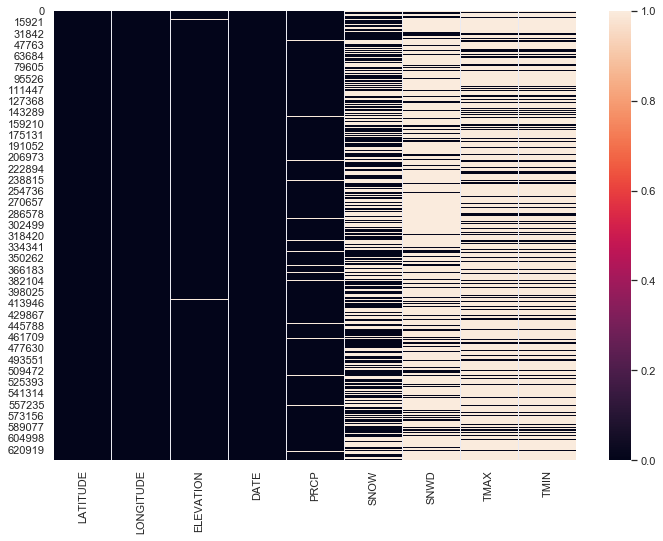

In [10]:
#plotting null values
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(frame.isna())

## Data Visualization

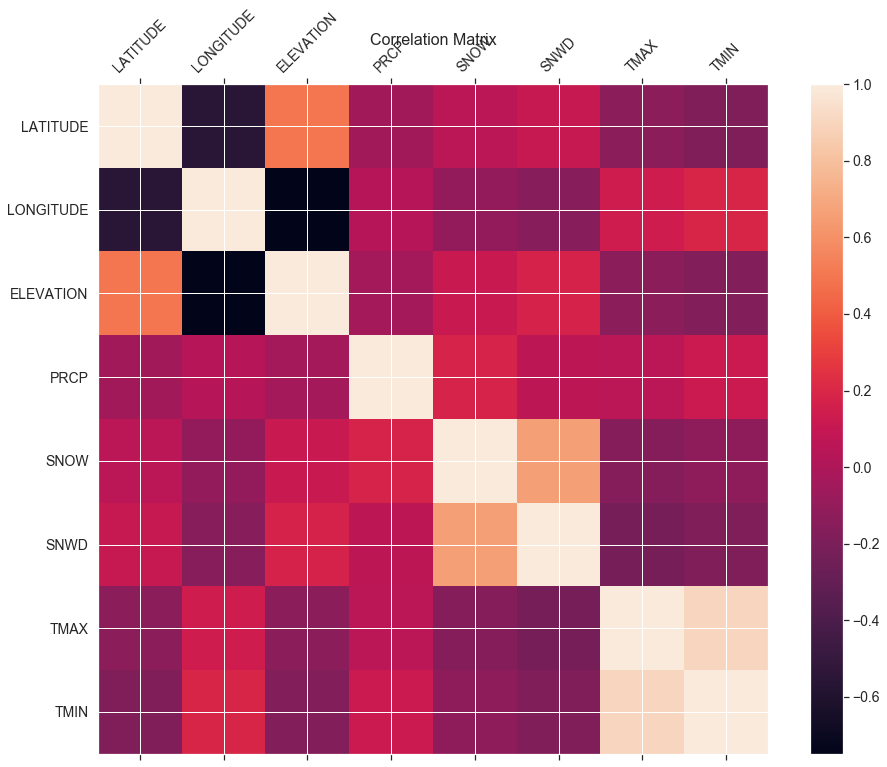

In [13]:
#Correlation Matrix

f = plt.figure(figsize=(15, 12))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

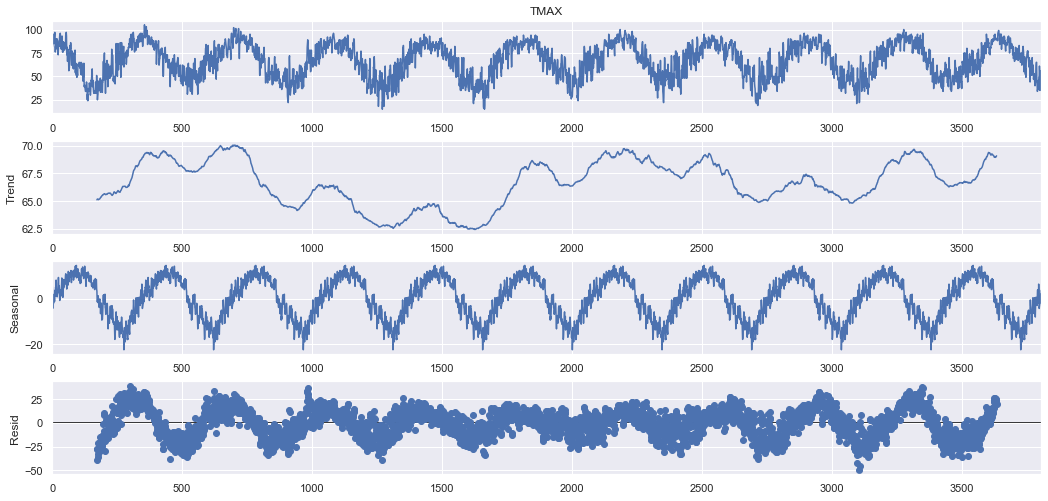

In [53]:
#Seasonal Decompose

from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = dfn['TMAX']
result = seasonal_decompose(series, model='additive', period=345)
result.plot()
plt.gcf().set_size_inches(15,7)
pyplot.show()

### Preparing data for a smaller sample

In [5]:
cols_t = ["DATE","TMAX","PRCP","TMIN"]

In [6]:
dfn = pd.read_csv(r"C:\Users\bobby\Downloads\2667007.csv", index_col=None, usecols = lambda c: c in set(cols_t) ,sep = ',')

In [37]:
dfn['DATE'] = pd.to_datetime(dfn['DATE'], format = '%Y-%m-%d')

In [28]:
dfn['Year'] = pd.DatetimeIndex(dfn['DATE']).year
dfn['Month'] = pd.DatetimeIndex(dfn['DATE']).month
dfn['Day'] = pd.DatetimeIndex(dfn['DATE']).day

In [29]:
del dfn['DATE']

In [30]:
dfn.head()

,PRCP,TMAX,TMIN,Year,Month,Day
0,0.01,81,65,2010,8,1
1,0.04,82,69,2010,8,2
2,0.00,84,72,2010,8,3
3,0.00,93,73,2010,8,4
4,1.03,95,70,2010,8,5


### Minimum vs Maximum temperature 

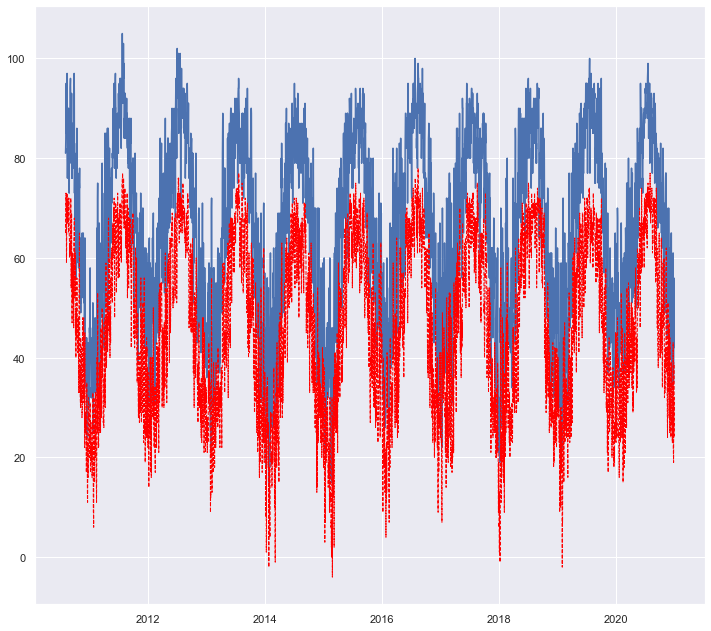

In [46]:
x = dfn['DATE']
y1 = dfn['TMAX']
y2 = dfn['TMIN']

plt.figure(figsize=(12,11))
plt.plot(x, y1)
plt.plot(x, y2, color='red',linewidth=1.0,linestyle='--')

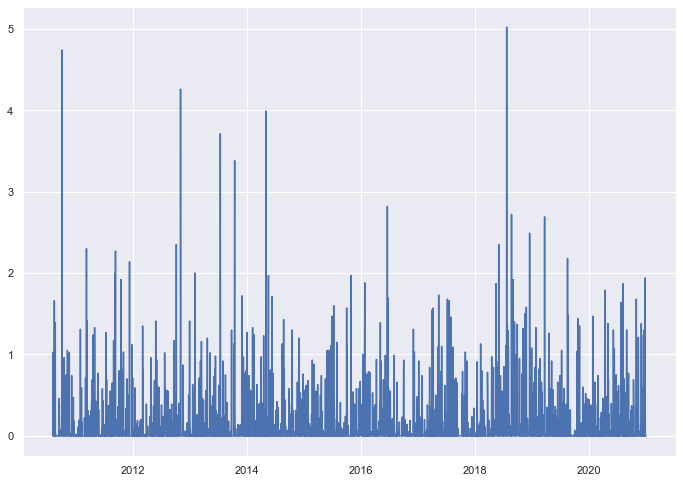

In [47]:
y3 = dfn['PRCP']
plt.plot(x,y3)
plt.show()

(array([ 22.,  85., 297., 463., 503., 530., 563., 732., 560.,  51.]),
 array([ 15.,  24.,  33.,  42.,  51.,  60.,  69.,  78.,  87.,  96., 105.]),
 <a list of 10 Patch objects>)

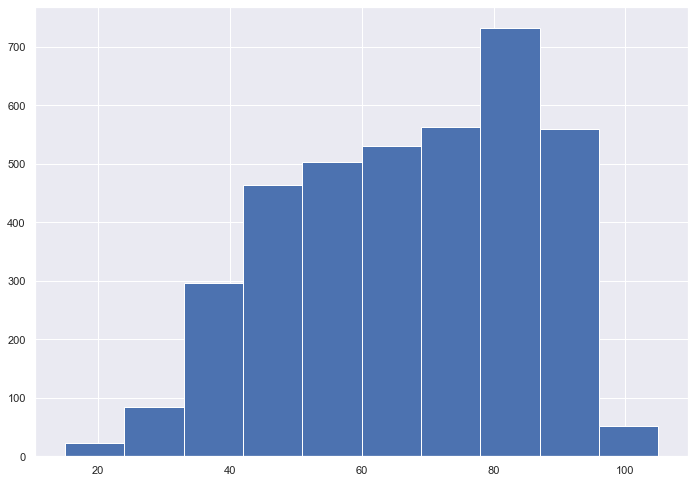

In [55]:
plt.hist(y)

(array([ 15.,  58., 152., 463., 595., 569., 441., 515., 693., 305.]),
 array([-4. ,  4.2, 12.4, 20.6, 28.8, 37. , 45.2, 53.4, 61.6, 69.8, 78. ]),
 <a list of 10 Patch objects>)

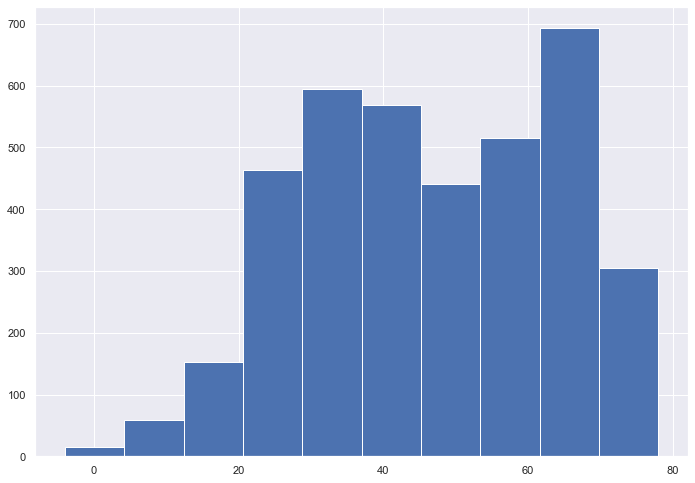

In [57]:
plt.hist(y2)

### Coverting into csv

In [7]:
path = r"C:\DataScience\606\Machine+Learning+A-Z+(Codes+and+Datasets)\Data ML\weathern.csv"

In [8]:
dfn.to_csv(path_or_buf=path)